In [1]:
rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, showtext, srvyr,httr,utils)
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)
font_add_google("Poppins", "pop")
showtext_auto()

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\Rtmp8AtPyf\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\Rtmp8AtPyf\remotes85ec51b617aa\cpyp-ipdp-funcionespgd-3fffa52/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
getwd()

[1] "c:/Users/claud/Documents/GitHub/pgd_cdmx/indicadores/juventudes"

In [3]:
# Función para descargar los datos de la ENOE en formato CSV
descargar_enoe_csv <- function() {
  # Crear directorio de trabajo si no existe
  if (!dir.exists("datos")) {
    dir.create("datos")
  }
  if (!dir.exists("datos/enoe")) {
    dir.create("datos/enoe")
  }

  # Cambiar al directorio de trabajo
  setwd("datos/enoe")

  # Función para descargar y extraer archivos
  descargar_extraer <- function(url) {
    temp <- tempfile()
    download.file(url, temp, mode = "wb")
    unzip(temp)
    unlink(temp)
  }

  # Descargar datos de 2005 a 2009
  for (i in 7:9) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/200", i, "trim4_csv.zip")
    descargar_extraer(url)
  }

  # Descargar datos de 2010 a 2019
  for (i in 10:19) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/20", i, "trim4_csv.zip")
    print(url)
    descargar_extraer(url)
  }

  # Descargar datos de 2020
  for (i in 20:20) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_20", i, "_trim4_csv.zip")
    descargar_extraer(url)
  }

  # Descargar datos de 2021 a 2022
  for (i in 21:22) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_20", i, "_trim4_csv.zip")
    descargar_extraer(url)
  }

  # Descargar datos de 2023
  for (i in 23:24) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_20", i, "_trim4_csv.zip")
    descargar_extraer(url)
  }

  # Eliminar archivos innecesarios (conservar solo SDEMT y COE1T)
  # Listar archivos con extensión .csv, sin importar mayúsculas/minúsculas
  archivos <- list.files(pattern = "\\.csv$", ignore.case = TRUE)

  # Lista de archivos a eliminar (que NO contienen "SDEMT" o "COE1T", sin importar mayúsculas/minúsculas)
  archivos_a_eliminar <- archivos[!grepl("sdemt|coe1t", archivos, ignore.case = TRUE)]
  file.remove(archivos_a_eliminar)

  # Eliminar archivo zip (si existe)
  if (file.exists("archivos.zip")) {
    file.remove("archivos.zip")
  }

  # Regresar al directorio original
  setwd("../..")
}

In [5]:
# Función para extraer el año desde el nombre del archivo
extraer_anio <- function(path) {
  anio_str <- str_extract(path, "\\d{2}(?=\\D*$)") # Extrae los últimos dos dígitos del año
  anio <- as.numeric(paste0("20", anio_str)) # Convierte a formato 20XX
  return(anio)
}

In [5]:
options(timeout = 300)
descargar_enoe_csv()

[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2010trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2011trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2012trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2013trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2014trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2015trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2016trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2017trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2018trim4_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2019trim4_csv.zip"


In [2]:
indicadores_jovenes<-function(archivo, variable){
  year <- extraer_anio(archivo)
  data <- read_csv(archivo, show_col_types = FALSE) %>%
    janitor::clean_names()%>%
     #Crear grupos de edad
mutate(gpoedad=case_when(eda>=15 & eda<=29 ~ "jovenes",
TRUE ~ "otros"), 
#Añadir el año
year = year) 

#Crea diseño muestral

  # Crear diseño de encuesta
  options(survey.lonely.psu = "certainty")
  if (year <= 2019) {
    dm <- data %>%
      as_survey_design(
        ids = upm,
        strata = est_d,
        weights = fac,
        nest = TRUE
      )
  } else {
    dm <- data %>%
      as_survey_design(
        ids = upm,
        strata = est_d_tri,
        weights = fac_tri,
        nest = TRUE
      )
  }



  ##Obtener resultados

  resultado<-if (variable=="ocupados") {
   dm%>%
filter(r_def ==00, (c_res == 1 | c_res == 3),
         eda >= 15  & eda <= 98) %>%
filter(ent == 9, clase2 == 1) %>%
group_by(gpoedad) %>%
summarize(ocupados = survey_total(vartype="cv"),
pct= survey_prop( vartype="cv")) %>%
ungroup() %>%
mutate(pct = pct*100)%>%
filter(gpoedad == "jovenes")%>%
mutate(year = year)
  } 

else if (variable == "desocupados") {
  dm%>%
filter(r_def ==00, (c_res == 1 | c_res == 3),
         eda >= 15  & eda <= 98) %>%
filter(ent == 9) %>%
group_by(gpoedad,clase2) %>%
summarize(desocupados = survey_total(vartype="cv"),
          pct = survey_prop(vartype="cv")) %>%
ungroup() %>%
mutate(pct = pct*100)%>%
#Filtrar desocupados
filter(clase2 == 2) %>%
filter(gpoedad == "jovenes") %>%
mutate(year = year)
}


else if (variable=="informal"){

dm%>%
filter(r_def ==00, (c_res == 1 | c_res == 3),
         eda >= 15  & eda <= 98) %>%
filter(ent == 9, clase2 == 1) %>%
mutate(condinf=
case_when(mh_col %in% c(1,3,5,7,9) ~ "condiciones de informalidad",
TRUE ~ "condiciones de formalidad")) %>% 
group_by(gpoedad,condinf) %>%
summarize(ocupados = survey_total(vartype="cv"),
pct= survey_prop( vartype="cv")) %>%
ungroup() %>%
mutate(pct = pct*100) %>%
filter(gpoedad == "jovenes")%>%
filter(condinf=="condiciones de informalidad") %>%
mutate(year=year)

  
}



else if (variable=="criticas"){

dm%>%
filter(r_def ==00, (c_res == 1 | c_res == 3),
         eda >= 15  & eda <= 98) %>%
filter(ent == 9, clase2 == 1) %>%
mutate(concrit=case_when(tcco ==0 ~ "Normales",
TRUE ~ "Criticas")) %>%
group_by(gpoedad,concrit) %>%
summarize(ocupados = survey_total(vartype="cv"),
pct= survey_prop( vartype="cv")) %>%
ungroup() %>%
mutate(pct = pct*100) %>%
filter(gpoedad == "jovenes")%>%
filter(concrit=="Criticas") %>%
mutate(year=year)

}



else {
    stop("El parámetro 'variable' debe ser 'ocupado', 'desocupado', 'informal' o 'criticas'")
  }

  return(resultado)
}

In [6]:
lista_archivos <- list.files(path = "datos/enoe", full.names = TRUE)
archivos_sdemt <- lista_archivos[str_detect(lista_archivos, regex("sdemt", ignore_case = TRUE))]

In [7]:
# Crear un data frame con los nombres de archivos y sus años
df_archivos <- tibble(
  sdemt = archivos_sdemt,
  year = map_int(archivos_sdemt, extraer_anio)
) %>%
  
  filter(!is.na(sdemt))%>%
        arrange(year)
df_archivos

sdemt,year
<chr>,<int>
datos/enoe/SDEMT407.csv,2007
datos/enoe/SDEMT408.csv,2008
datos/enoe/SDEMT409.csv,2009
datos/enoe/SDEMT410.csv,2010
datos/enoe/SDEMT411.csv,2011
datos/enoe/sdemt412.csv,2012
datos/enoe/sdemt413.csv,2013
datos/enoe/SDEMT414.csv,2014
datos/enoe/SDEMT415.csv,2015


In [8]:
print("Población ocupada joven en la Ciudad de México")
empleo_joven <- df_archivos %>%
  select(-year) %>%
  mutate(data = map(sdemt, ~indicadores_jovenes(.x, "ocupados"))) %>%  
  unnest(data) %>%
  select(year, ocupados, ocupados_cv, pct, pct_cv) %>%
  mutate(pct = round(pct, 2))
empleo_joven

[1] "Población ocupada joven en la Ciudad de México"


Warning message:
"There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(sdemt, ~indicadores_jovenes(.x, "ocupados"))`.
Caused by warning:
! One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings."


year,ocupados,ocupados_cv,pct,pct_cv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007,1007209,0.03636647,25.40,0.02819938
2008,973784,0.03582696,25.33,0.02923560
2009,975498,0.03796285,24.94,0.03051726
2010,980232,0.03772471,25.14,0.02909084
2011,1074304,0.03482920,26.06,0.02741822
2012,1067165,0.03533738,25.28,0.02840302
2013,1047736,0.03591792,24.70,0.02928420
2014,982598,0.03797204,23.75,0.03078410
2015,1029392,0.03679888,24.03,0.03025514


In [9]:
print("Población desocupada joven en la Ciudad de México")
desempleo_joven <- df_archivos %>%
  select(-year) %>%
  mutate(data = map(sdemt, ~indicadores_jovenes(.x, "desocupados"))) %>%  
  unnest(data) %>%
  select(year, desocupados, desocupados_cv, pct, pct_cv) %>%
  mutate(pct = round(pct, 2))
desempleo_joven

[1] "Población desocupada joven en la Ciudad de México"


Warning message:
"There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(sdemt, ~indicadores_jovenes(.x, "desocupados"))`.
Caused by warning:
! One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings."


year,desocupados,desocupados_cv,pct,pct_cv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007,131034,0.08837578,6.13,0.08606912
2008,113597,0.10316362,5.29,0.09984667
2009,144318,0.08798432,6.54,0.08446248
2010,127066,0.09741072,5.84,0.09597333
2011,128773,0.08901289,5.86,0.08590894
2012,134657,0.08929776,6.20,0.08692967
2013,123283,0.09581271,5.75,0.09321894
2014,122960,0.09642501,5.74,0.09355510
2015,124436,0.10273239,5.80,0.09956879


In [10]:
print("Población desocupada joven en condiciones de informalidad en la Ciudad de México")
tabla_informalidad<-df_archivos %>%
  select(-year) %>%
  mutate(data = map(sdemt, ~indicadores_jovenes(.x, "informal"))) %>%  
  unnest(data) %>%
  select(year, ocupados, ocupados_cv, pct, pct_cv) %>%
  mutate(pct = round(pct, 2))
tabla_informalidad

[1] "Población desocupada joven en condiciones de informalidad en la Ciudad de México"


Warning message:
"There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(sdemt, ~indicadores_jovenes(.x, "informal"))`.
Caused by warning:
! One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings."


year,ocupados,ocupados_cv,pct,pct_cv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007,553962,0.04975052,55.00,0.03287761
2008,528051,0.04737932,54.23,0.03184539
2009,537509,0.05243701,55.10,0.03266176
2010,536470,0.05042333,54.73,0.03345002
2011,573415,0.04930119,53.38,0.03345973
2012,606550,0.04488639,56.84,0.02914780
2013,611514,0.04691056,58.37,0.02943362
2014,538642,0.05034032,54.82,0.03378124
2015,578129,0.04682687,56.16,0.03177903


In [11]:
print("Población ocupada joven en condiciones críticas de ocupación en la Ciudad de México")
tabla_criticas<-df_archivos %>%
  select(-year) %>%
  mutate(data = map(sdemt, ~indicadores_jovenes(.x, "criticas"))) %>%  
  unnest(data) %>%
  select(year, ocupados, ocupados_cv, pct, pct_cv) %>%
  mutate(pct = round(pct, 2))
tabla_criticas

[1] "Población ocupada joven en condiciones críticas de ocupación en la Ciudad de México"


Warning message:
"There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(sdemt, ~indicadores_jovenes(.x, "criticas"))`.
Caused by warning:
! One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings."


year,ocupados,ocupados_cv,pct,pct_cv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007,92021,0.10531927,9.14,0.09929173
2008,97747,0.10885973,10.04,0.10383074
2009,75195,0.12119076,7.71,0.11858910
2010,135643,0.10424774,13.84,0.09479283
2011,99062,0.10911707,9.22,0.10423864
2012,115297,0.09660090,10.80,0.09279553
2013,118168,0.10719374,11.28,0.10280466
2014,130966,0.09362019,13.33,0.08853527
2015,144272,0.09237130,14.02,0.08725504


### Proyecciones

In [13]:
tcma_empleo<-((empleo_joven$pct[empleo_joven$year==2024]/empleo_joven$pct[empleo_joven$year==2020])^(1/(2024-2020))-1)

tcma_empleo

[1] 0.00443045

In [14]:
extendido_emp<-data.frame(year=2025:2045)
extendido_emp$pct<-empleo_joven$pct[empleo_joven$year==2024]*cumprod(rep(1+tcma_empleo,length(2025:2045)))
extendido_emp%>%
mutate(pct=round(pct,2))

year,pct
<int>,<dbl>
2025,21.20
2026,21.30
2027,21.39
2028,21.49
2029,21.58
2030,21.68
2031,21.77
2032,21.87
2033,21.97


In [40]:
  serie_completa_empleo <- dplyr::bind_rows(
    empleo_joven %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "pct"),

    extendido_emp %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.002, año_base = 2024,var="pct"))
serie_completa_empleo

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2007,25.40000,25.40000,25.40000
2008,25.33000,25.33000,25.33000
2009,24.94000,24.94000,24.94000
2010,25.14000,25.14000,25.14000
2011,26.06000,26.06000,26.06000
2012,25.28000,25.28000,25.28000
2013,24.70000,24.70000,24.70000
2014,23.75000,23.75000,23.75000
2015,24.03000,24.03000,24.03000


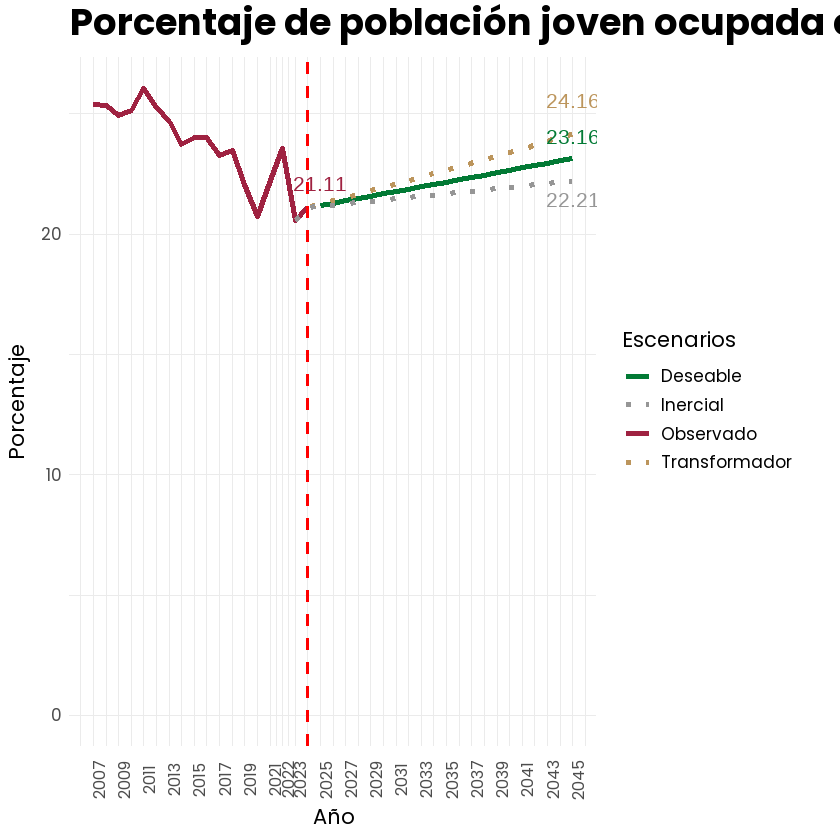

In [41]:
grafica_bonita(
  data = serie_completa_empleo,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población joven ocupada en la CDMX",
  ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 1),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/empleo_joven.png",
 width = 10, height = 6, dpi = 200, bg = "white")

In [42]:
tcma_desempleo<-((desempleo_joven$pct[desempleo_joven$year==2024]/desempleo_joven$pct[desempleo_joven$year==2020])^(1/(2024-2020))-1)
tcma_desempleo

[1] -0.01416027

In [43]:
extendido_desemp <- data.frame(year=2025:2045)
extendido_desemp$pct <- desempleo_joven$pct[desempleo_joven$year==2024]*cumprod(rep(1+tcma_desempleo,length(2025:2045)))
extendido_desemp %>%
  mutate(pct=round(pct,2))

year,pct
<int>,<dbl>
2025,4.87
2026,4.80
2027,4.73
2028,4.67
2029,4.60
2030,4.53
2031,4.47
2032,4.41
2033,4.34


In [49]:
 serie_completa_desempleo <- dplyr::bind_rows(
    desempleo_joven %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "pct"),

    extendido_desemp %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.004, año_base = 2024,var="pct"))
serie_completa_desempleo

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2007,6.130000,6.130000,6.130000
2008,5.290000,5.290000,5.290000
2009,6.540000,6.540000,6.540000
2010,5.840000,5.840000,5.840000
2011,5.860000,5.860000,5.860000
2012,6.200000,6.200000,6.200000
2013,5.750000,5.750000,5.750000
2014,5.740000,5.740000,5.740000
2015,5.800000,5.800000,5.800000


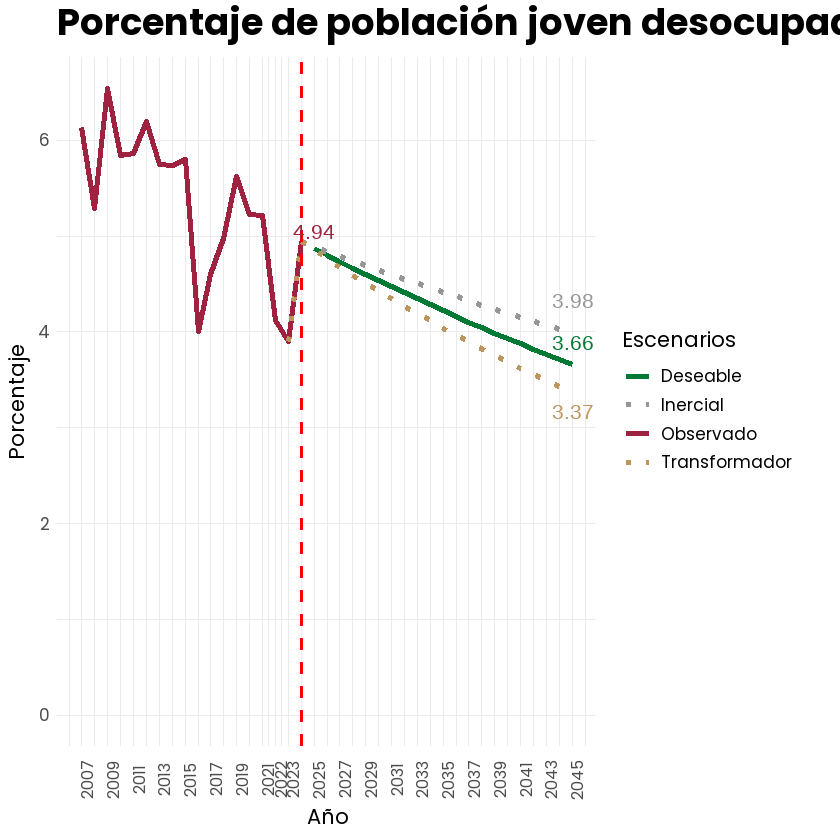

In [52]:
grafica_bonita(
  data = serie_completa_desempleo,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población joven desocupada en la CDMX",
  ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 0.1),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/desempleo_joven.png",
 width = 10, height = 6, dpi = 200, bg = "white")

In [59]:
tcma_informal <- ((tabla_informalidad$pct[tabla_informalidad$year==2024]/tabla_informalidad$pct[tabla_informalidad$year==2019])^(1/(2024-2019))-1)
tcma_informal

[1] -0.002304082

In [60]:
extendido_informal <- data.frame(year=2025:2045)
extendido_informal$pct <- tabla_informalidad$pct[tabla_informalidad$year==2024]*cumprod(rep(1+tcma_informal,length(2025:2045)))
extendido_informal %>%
  mutate(pct=round(pct,2))

year,pct
<int>,<dbl>
2025,50.74
2026,50.63
2027,50.51
2028,50.39
2029,50.28
2030,50.16
2031,50.05
2032,49.93
2033,49.81


In [61]:
 serie_completa_informal <- dplyr::bind_rows(
    tabla_informalidad %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "pct"),

    extendido_informal %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.004, año_base = 2024,var="pct"))
serie_completa_informal

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2007,55.00000,55.00000,55.00000
2008,54.23000,54.23000,54.23000
2009,55.10000,55.10000,55.10000
2010,54.73000,54.73000,54.73000
2011,53.38000,53.38000,53.38000
2012,56.84000,56.84000,56.84000
2013,58.37000,58.37000,58.37000
2014,54.82000,54.82000,54.82000
2015,56.16000,56.16000,56.16000


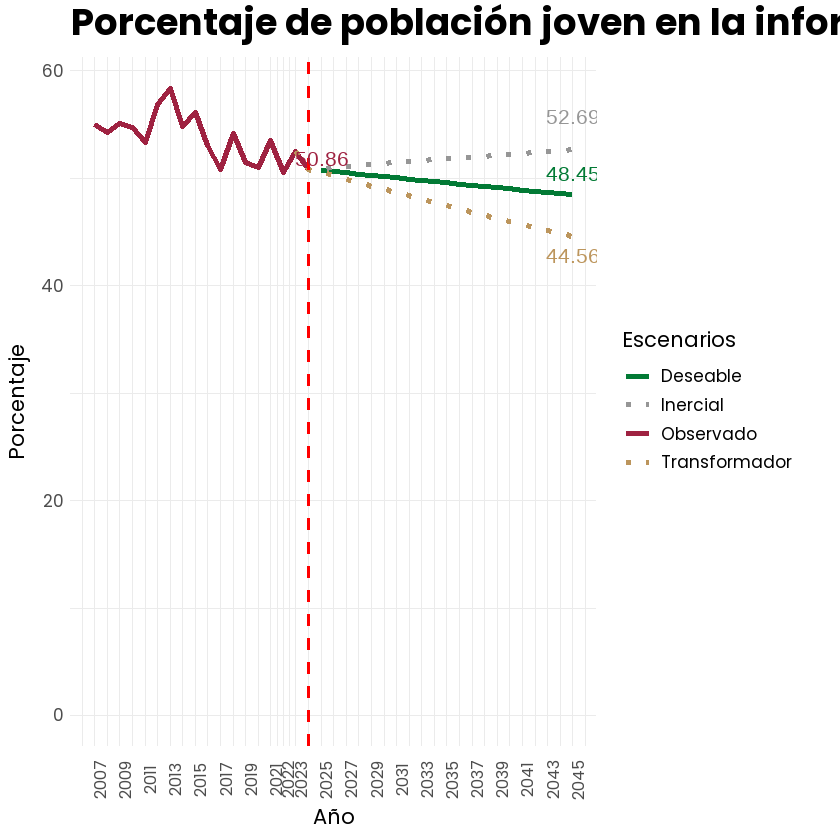

In [63]:
grafica_bonita(
  data = serie_completa_informal,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población joven en la informalidad en la CDMX",
  ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(1, 1),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/informalidad_joven.png",
 width = 10, height = 6, dpi = 200, bg = "white")